In [86]:
import pandas as pd
import numpy as np

timeseries_df = pd.read_csv("timeseries.csv")
month_year_df = timeseries_df[['YearMonth', 'Value']]
month_df = timeseries_df[['Month', 'Value']]

display(timeseries_df.head())
display(month_year_df.head())
display(month_df.head())

,YearMonth,Month,Value
0,2004-12,12,33
1,2005-01,1,64
2,2005-02,2,54
3,2005-03,3,56
4,2005-04,4,100


,YearMonth,Value
0,2004-12,33
1,2005-01,64
2,2005-02,54
3,2005-03,56
4,2005-04,100


,Month,Value
0,12,33
1,1,64
2,2,54
3,3,56
4,4,100


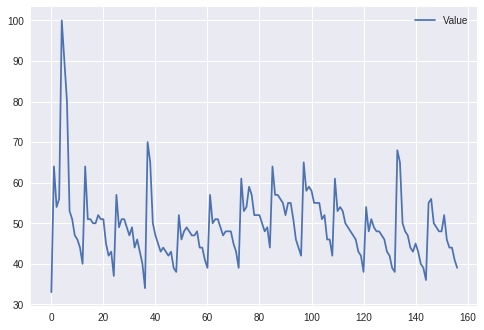

In [87]:
month_year_df.plot.line()

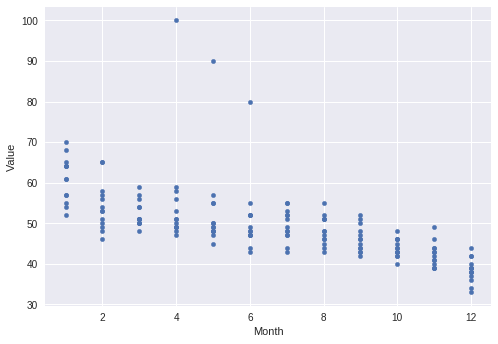

In [88]:
month_df.plot.scatter(x = 'Month', y = 'Value')

In [89]:
def remove_outliers(df, delta):
  outliers = []
  outliers_df = None
  for feature in df.keys():

      Q1 = np.percentile(df[feature], 25)

      Q3 = np.percentile(df[feature], 75)

      step = (Q3 - Q1)*delta
      outliers_df = df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))]
      outliers.extend(outliers_df.index.values)
      print("Data points considered outliers for the feature '{}':".format(feature))
      display(outliers_df)

  clean_df = df.drop(df.index[outliers]).reset_index(drop = True)
  return clean_df, outliers_df

month_df, outliers_df = remove_outliers(month_df, float(1.5))

Data points considered outliers for the feature 'Month':


,Month,Value


Data points considered outliers for the feature 'Value':


,Month,Value
4,4,100
5,5,90
6,6,80
37,1,70
133,1,68


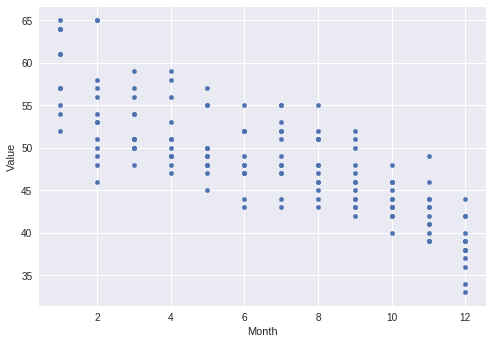

In [90]:
month_df.plot.scatter(x = 'Month', y = 'Value')

,Month,Value
4,4,100
5,5,90
6,6,80
37,1,70
133,1,68


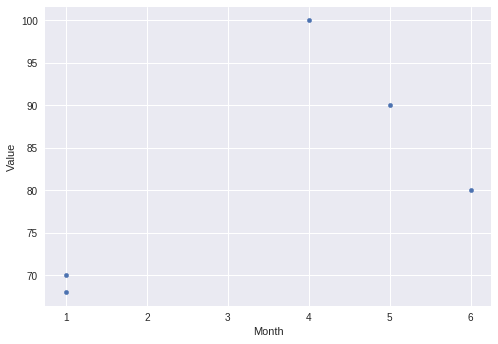

In [91]:
display(outliers_df)
outliers_df.plot.scatter(x = 'Month', y = 'Value')

In [92]:
thershold_df, outliers_df = remove_outliers(outliers_df, 10)
display(thershold_df)

Data points considered outliers for the feature 'Month':


,Month,Value


Data points considered outliers for the feature 'Value':


,Month,Value


,Month,Value
0,4,100
1,5,90
2,6,80
3,1,70
4,1,68


In this example the outliers suggest a range from 4 to 6 tolerance for values out of the media.
